<a href="https://colab.research.google.com/github/Hiteshshekhawat/-Online-Shop---Full-Analysis/blob/main/%F0%9F%9B%92_Online_Shop_Full_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Online Shop Customer Sales Data.csv.zip",encoding= 'unicode_escape')

In [ ]:
drive.flush_and_unmount()

# DATA DICTIONARY 

Customer_id = unique customer id

Age = customer's age

Gender = 0: Male, 1: Female

Revenue_Total = total sales by customer

N_Purchases = number of purchases to date

Purchase_DATE = date latest purchase, dd.mm.yy

Purchase_VALUE = latest purchase in €

Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

Time_Spent = time spent (in sec) on website

Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other

Newsletter = 0: not subscribed, 1: subscribed

Voucher = 0: not used, 1: used

# KNOWING DATASET

In [ ]:
df.head(3)

,ï»¿Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0


In [ ]:
df.tail(3)

,ï»¿Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


In [ ]:
print("number of rows and columns : ")
df.shape

number of rows and columns : 


(65796, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ï»¿Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Customer_id  65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [ ]:
#Null values in dataset
print("Total Null Values in dataset :")
print(df.isnull().sum().sum())

Total Null Values in dataset :
0


In [ ]:
# dupicate Values in dataset

print("Total Duplicated values in dataset :")
print(df.duplicated().sum())

Total Duplicated values in dataset :
0


In [ ]:
# Drop Customer_id

df.drop('ï»¿Customer_id', axis = 1, inplace = True)

# Splitting the date into month and year

df['Month'] = df['Purchase_DATE'].str.split('.').str[1]
df['Year'] = df['Purchase_DATE'].str.split('.').str[2]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Drop Purchase_DATE

df.drop('Purchase_DATE', axis = 1, inplace = True)

In [ ]:
df.head(3)

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,53,0,45.3,2,24.915,1,885,0,0,0,6,21
1,18,1,36.2,3,2.896,2,656,0,0,1,12,21
2,52,1,10.6,1,10.600,0,761,0,1,0,3,21


In [ ]:
# Calculate the mean and std
mean = np.mean(df['Purchase_VALUE'])
std = np.std(df['Purchase_VALUE'])

# Calculate the Z-score
z_scores = (df['Purchase_VALUE'] - mean) / std

# Set a Z-score threshold
threshold = 3

# Identify the indices of the outliers based on the Z-score threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Drop the outliers
df.drop(df.index[outlier_indices], inplace = True)

### We just use z - score to exclude outliers from the dataset

###### It defined as - The z-score is calculated by the difference between the specific value and the mean of the data set, divided by the standard deviation of the data set. The formula for calculating the z-score is as follows:

# z = (x - μ) / σ

##### x is the specific value

##### μ is the mean of the data set

##### σ is the standard deviation of the data set

# Exploratory Data Analysis(EDA)

### 1. Total number of customer according to their Genders.

In [ ]:
Gender = df['Gender'].value_counts()
Gender

1    43871
0    21503
Name: Gender, dtype: int64

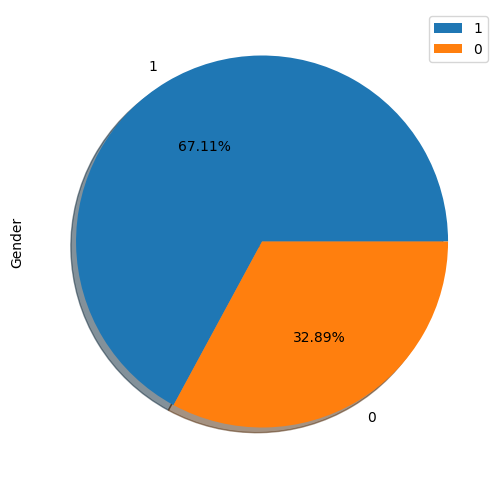

In [ ]:
Gender.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,8))
plt.legend()
plt.show()

Gender = 0: Male, 1: Female

Here from above observation females are nearly double of males i.e. 67.11% and 32.89% respectively

### 2. Number of purchases to the date.

Number of purchases
2    9414
3    9406
7    9403
5    9394
6    9327
4    9246
1    9184
Name: N_Purchases, dtype: int64


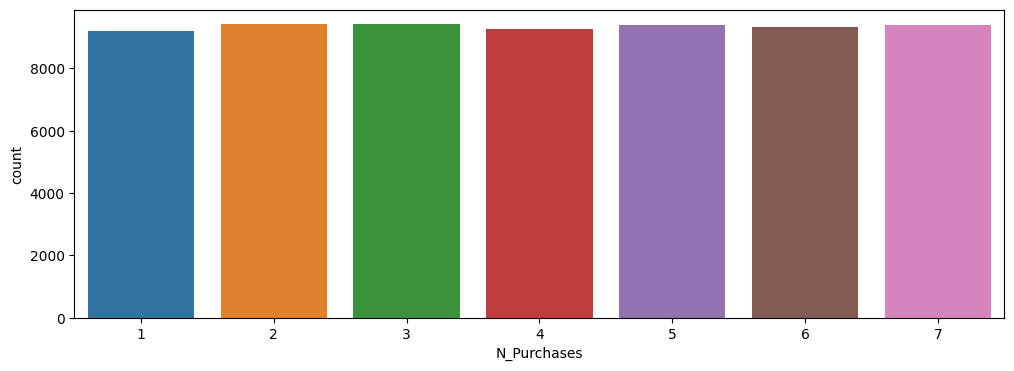

In [ ]:
Number_of_purchases = df['N_Purchases'].value_counts()
print("Number of purchases")
print(Number_of_purchases)
plt.figure(figsize=(12,4))

sns.countplot(x = df['N_Purchases'])
plt.show()

### 3. Monthly count of sales.

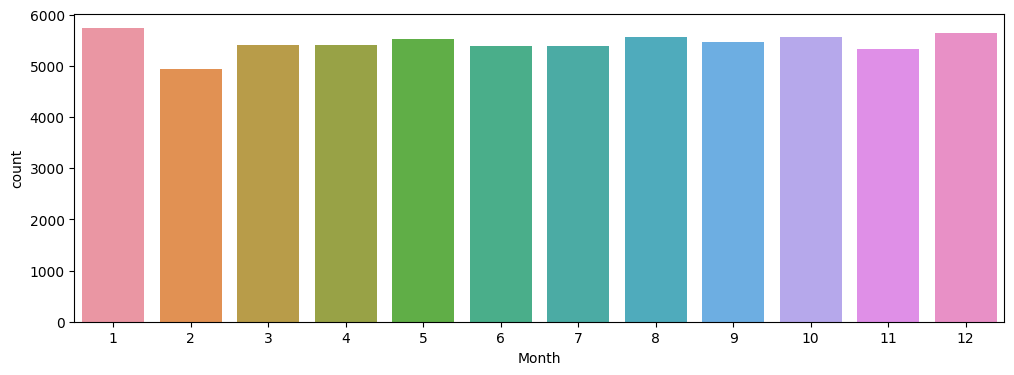

In [ ]:
plt.figure(figsize=(12,4))

sns.countplot(x = df['Month'])
plt.show()

### 4. Mode of payment by customers in percentages.

In [ ]:
Payment_method = df['Pay_Method'].value_counts()

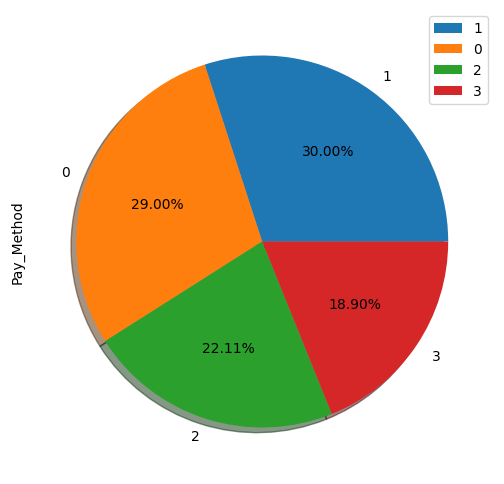

In [ ]:
Payment_method.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,8))
plt.legend()
plt.show()

 0: Digital Wallets,
 
 1: Card,
 
 2: PayPal,
 
 3: Other
 
 Here, from observation maximum payment method is by CARD with 30%. Whereas the mininmum method which is used by customers is with other that may be cash or something i.e. around 18.90%.

### 5. Different type of Browser use by customers while ordering product.

In [ ]:
Browser = df['Browser'].value_counts()

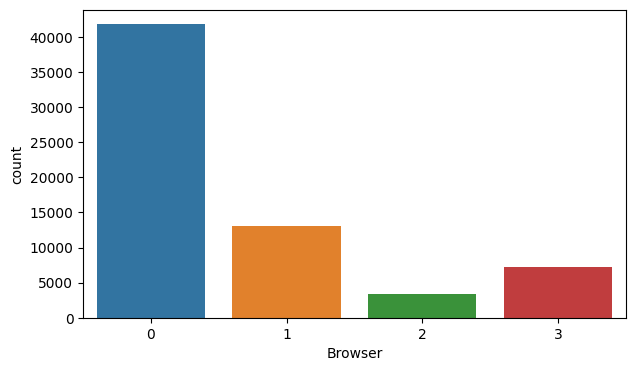

In [ ]:
plt.figure(figsize=(7,4))

sns.countplot(x = df['Browser'])
plt.show()

#### percentage of using different browser

Axes(0.255833,0.11;0.513333x0.77)


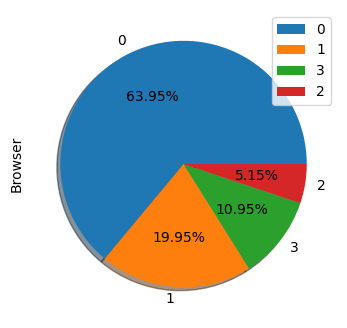

In [ ]:
print(Browser.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,4)))
plt.legend()
plt.show()

Browser :

0: Chrome,

1: Safari, 

2: Edge, 

3: Other

Here the maximum browser which is used by customers are chrome 63.95% of other browsers followed by Safari i.e. 19.95% , edge i.e. 5.15% and the other browsers i.e. about 10.95%%

### 6. Number and Percentage of customers who has subscribed or Not subscribed newspaper.

In [ ]:
Newsletter = df['Newsletter'].value_counts()

0    55506
1     9868
Name: Newsletter, dtype: int64


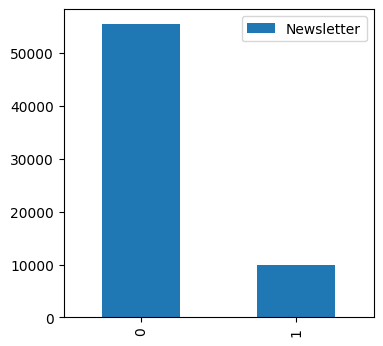

In [ ]:
print(Newsletter)
Newsletter.plot.bar(figsize = (4,4))
plt.legend()
plt.show()

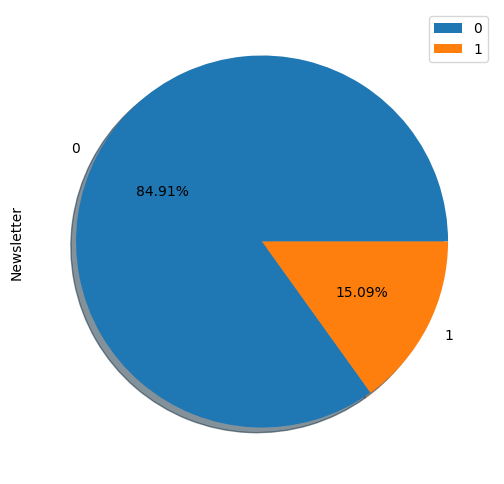

In [ ]:
Newsletter.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,8))
plt.legend()
plt.show()

Newsletter 
    
0: notsubscribed
    
1: subscribed

Here the maximum customers haven't subscribe the newspaper i.e around 84.91%. whereas 15.09% of customers had subscribe the newspapers.

### 7. Number and Percentages of customers who use vouchers while ordering

In [ ]:
Voucher = df['Voucher'].value_counts()
Voucher

0    49015
1    16359
Name: Voucher, dtype: int64

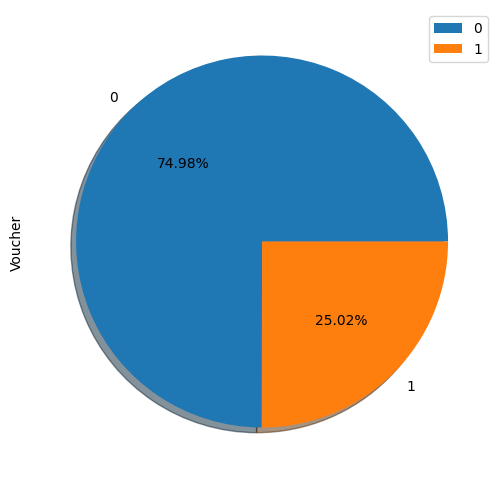

In [ ]:
Voucher.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,8))
plt.legend()
plt.show()

Voucher =

0: not used 

1: used

Here, 74.98% of customer didnt used vouchar in there order whereas 25.02% customers used voucher in there orders.

### 8. Comparison between Revenue Total and Purchase total.

```
# This is formatted as code
```



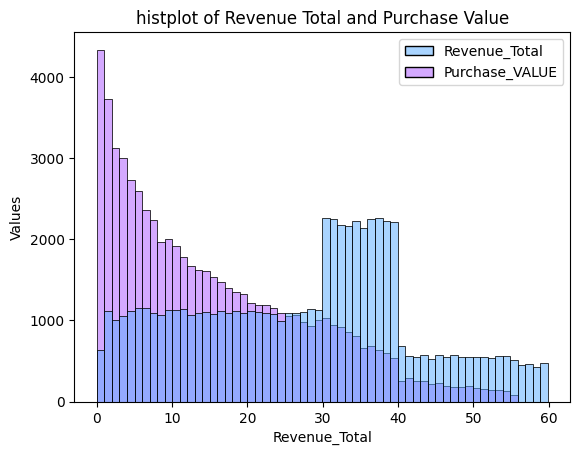

In [ ]:
sns.histplot(data = df[['Revenue_Total','Purchase_VALUE']], palette = 'cool')

# Set the title/labels
plt.title('histplot of Revenue Total and Purchase Value')
plt.xlabel('Revenue_Total')
plt.ylabel('Values')

plt.show()

### 9. Total revenue with respect to Browser.

In [ ]:
Total_revenue_wrt_Browser = pd.DataFrame(df.groupby('Browser').sum()['Revenue_Total'])
Total_revenue_wrt_Browser = Total_revenue_wrt_Browser.sort_values('Revenue_Total',ascending=False)
Total_revenue_wrt_Browser

,Revenue_Total
Browser,
0,1154667.7
1,356690.2
3,197323.4
2,91550.9


From above table it is clear that most of booking is done in chrome browser 
so this is widely used browser followed by safari, edge and other browsers.

### 10. Total Revenue with respect to Gender

In [ ]:
Total_revenue_wrt_gender = pd.DataFrame(df.groupby('Gender').sum()['Revenue_Total'])
Total_revenue_wrt_gender = Total_revenue_wrt_gender.sort_values('Revenue_Total',ascending=False)
Total_revenue_wrt_gender

,Revenue_Total
Gender,
1,1207106.6
0,593125.6


#### Representation of total revenue with respect to Gender in percenrtages.

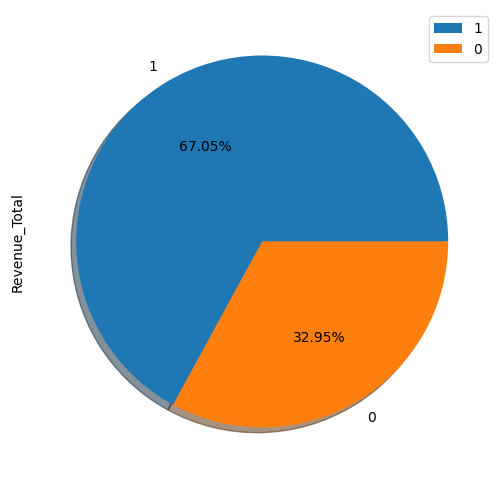

In [ ]:
Total_revenue_wrt_gender.plot.pie(autopct = '%1.2f%%',shadow = True,figsize = (6,8),subplots=True)
plt.legend()
plt.show()

Here, the most of the customers are females customers which is nearly 67.05% followed by 32.95% which are males customers.

### 11. Total revenue with repect to age of top 10 customers.

In [ ]:
Total_revenue_wrt_age = pd.DataFrame(df.groupby('Age').sum()['Revenue_Total'])
Total_revenue_wrt_age = Total_revenue_wrt_age.sort_values('Revenue_Total',ascending=False)
Total_revenue_wrt_age.head(10)

,Revenue_Total
Age,
39,40115.0
50,39430.9
57,39092.1
62,39070.9
45,39070.5
52,38993.3
25,38863.6
46,38789.7
32,38740.4


### 12. Total Revenue with respect to mode of payment used by customers.

In [ ]:
Total_revenue_wrt_Pay_method = pd.DataFrame(df.groupby('Pay_Method').sum()['Revenue_Total'])
Total_revenue_wrt_Pay_method = Total_revenue_wrt_Pay_method.sort_values('Revenue_Total',ascending=False)
Total_revenue_wrt_Pay_method

,Revenue_Total
Pay_Method,
1,538088.3
0,520463.2
2,399769.5
3,341911.2


### 13. Number of purchases according to Gender.

In [ ]:
Gender_purchases = pd.DataFrame(df.groupby('Gender').sum()['N_Purchases'])
Gender_purchases = Gender_purchases.sort_values('N_Purchases',ascending=False)
Gender_purchases

,N_Purchases
Gender,
1,175926
0,86041


### 14. Number of purchases made by customers according to months.

In [ ]:
Month_purchases = pd.DataFrame(df.groupby('Month').sum()['N_Purchases'])
Month_purchases = Month_purchases.sort_values('N_Purchases',ascending=False)
Month_purchases

,N_Purchases
Month,
1,23172
12,22386
10,22279
8,22199
9,22181
5,22070
7,21726
6,21695
4,21630


### 15. Number of purchases made by customers in year 2021 -22.

In [ ]:
yearly_purchases = pd.DataFrame(df.groupby('Year').sum()['N_Purchases'])
yearly_purchases = yearly_purchases.sort_values('N_Purchases',ascending=False)
print(yearly_purchases)



      N_Purchases
Year             
21         261310
22            657


Most of the sales are done in year 2021 which is around 261310 followed by 657 sales were done in 2022.

### 16. Maximum and Minimum aged customer with respect to Gender.

In [ ]:
Maximum_age_wrt_gender = pd.DataFrame(df.groupby('Gender').max()['Age'])
print(Maximum_age_wrt_gender)

        Age
Gender     
0        63
1        63


In [ ]:
Minimum_age_wrt_gender = pd.DataFrame(df.groupby('Gender').min()['Age'])
print(Minimum_age_wrt_gender)


        Age
Gender     
0        16
1        16


Female's customers Maximum and minimum age customers are 63 and 16 respectively which as same of males customers.